In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm 

In [13]:
dadosBioCombustiveis = pd.read_csv('biofuel-production.csv')

dadosBioCombustiveis.columns = ['Pais', 'Codigo', 'Ano', 'Eletricidade produzida por BioCombustíveis (TWh)']

# tentar limitar o ano, pois alguns paises so começaram a produzir energia a partir de biocombustiveis diante um ano específico
dadosBioCombustiveisBrazil = dadosBioCombustiveis[['Pais', 'Codigo', 'Ano', 'Eletricidade produzida por BioCombustíveis (TWh)']].loc[dadosBioCombustiveis['Pais'] == 'Brazil']

Text(0.5, 1.0, 'Eletricidade produzida por Biocombustíveis')

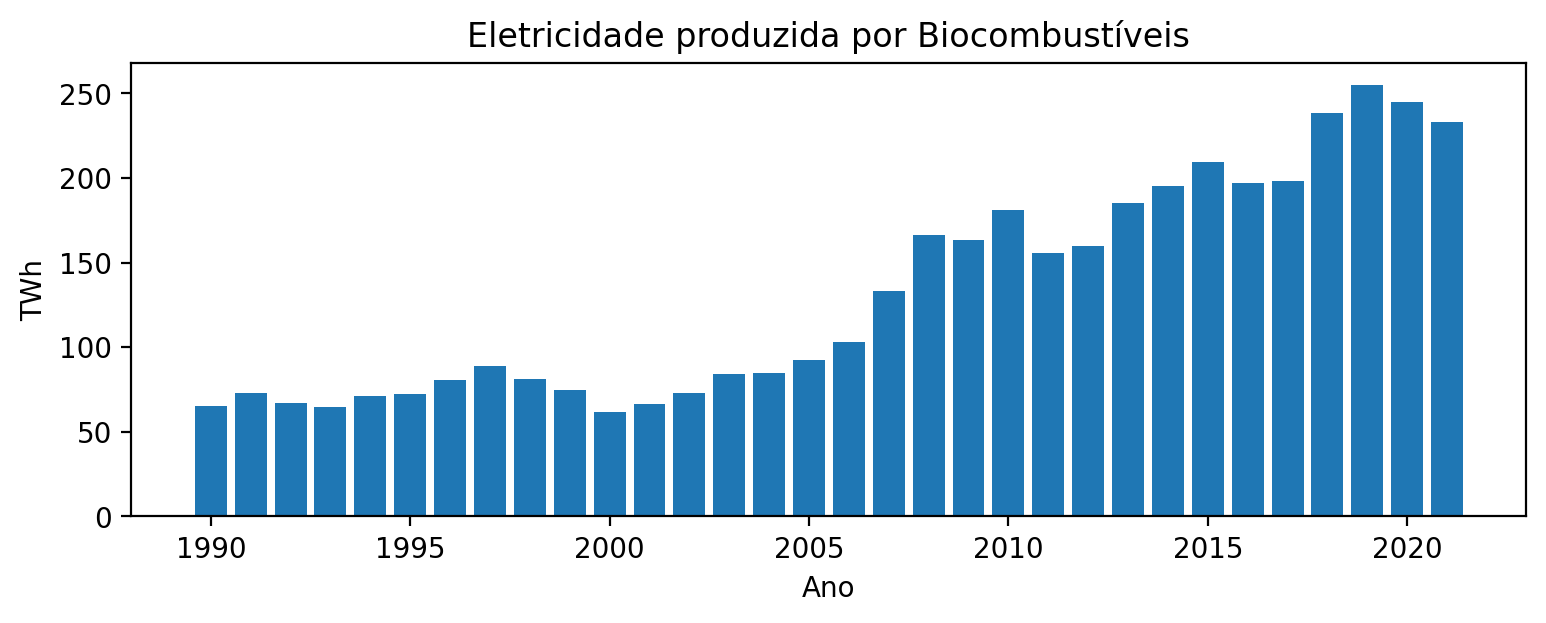

In [14]:
plt.figure(figsize=(9, 3),dpi=200)

plt.bar(dadosBioCombustiveisBrazil['Ano'], dadosBioCombustiveisBrazil['Eletricidade produzida por BioCombustíveis (TWh)']);

plt.xlabel('Ano');
plt.ylabel('TWh');

plt.title('Eletricidade produzida por Biocombustíveis')

In [15]:
# dadosBioCombustiveisBrazil = dadosBioCombustiveisBrazil.drop(range(182,192))
# dadosBioCombustiveisBrazil.index = list(range(1,23))

In [16]:
# Fazendo a predição manualmente

X = dadosBioCombustiveisBrazil['Ano'].values
Y = dadosBioCombustiveisBrazil['Eletricidade produzida por BioCombustíveis (TWh)'].values

In [17]:
media_X = np.mean(X)
media_Y = np.mean(Y)
erro_x = X-media_X
erro_y = Y-media_Y
soma_erro_xy = np.sum(erro_x*erro_y)
erro_x_quadratico = (X-media_X)**2.0
soma_erro_x_quadratico = np.sum(erro_x_quadratico)
m = soma_erro_xy / soma_erro_x_quadratico

print("Coeficiente angular = {:0.2f}".format(m))
c = media_Y - m*media_X
print("Coeficiente linear = {:0.2f}".format(c))
reta = m*X+c

# y = ax+b
# y = 6.48*x - 12865.30 -> Função da regressão linear para esses dados

Coeficiente angular = 6.48
Coeficiente linear = -12865.30


In [18]:
dadosBioCombustiveisBrazil['Predições'] = reta # adicionando as predições aqui

In [19]:
dadosBioCombustiveisBrazil

,Pais,Codigo,Ano,Eletricidade produzida por BioCombustíveis (TWh),Predições
182,Brazil,BRA,1990,65.005270,31.413790
183,Brazil,BRA,1991,72.908020,37.894552
184,Brazil,BRA,1992,66.798546,44.375314
185,Brazil,BRA,1993,64.799530,50.856075
186,Brazil,BRA,1994,71.164220,57.336837
187,Brazil,BRA,1995,72.528015,63.817599
188,Brazil,BRA,1996,80.751854,70.298361
189,Brazil,BRA,1997,88.757020,76.779123
190,Brazil,BRA,1998,81.040880,83.259885
191,Brazil,BRA,1999,74.773540,89.740647


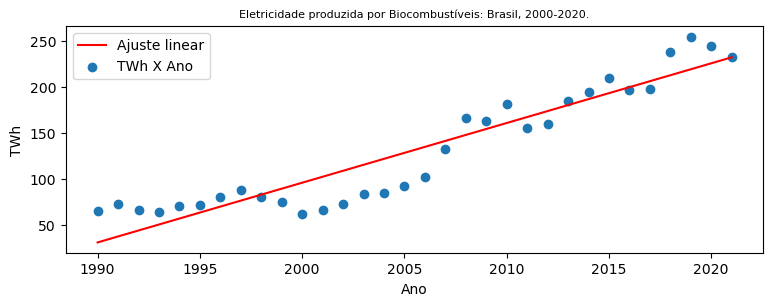

In [20]:
plt.figure(figsize=(9,3), dpi=100)

plt.scatter(X,Y,label='TWh X Ano');
plt.plot(X,reta,label='Ajuste linear',color='red');

plt.title('Eletricidade produzida por Biocombustíveis: Brasil, 2000-2020.', fontsize=8)
plt.xlabel('Ano');
plt.ylabel('TWh');

plt.legend();

In [21]:
# Adicionando Ano até 2030 no dataframe
# A simulação está no teste 02 até 2030
anos = [2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
twh_anos_22_30 = [] 

In [22]:
for anos in range(2022, 2031):
    x = (6.48*anos - 12865.30)
    twh_anos_22_30.append(x)

In [27]:
twh = list(twh_anos_22_30)
twh

[237.26000000000204,
 243.7400000000016,
 250.22000000000116,
 256.7000000000007,
 263.1800000000021,
 269.6600000000017,
 276.14000000000124,
 282.6200000000008,
 289.1000000000022]

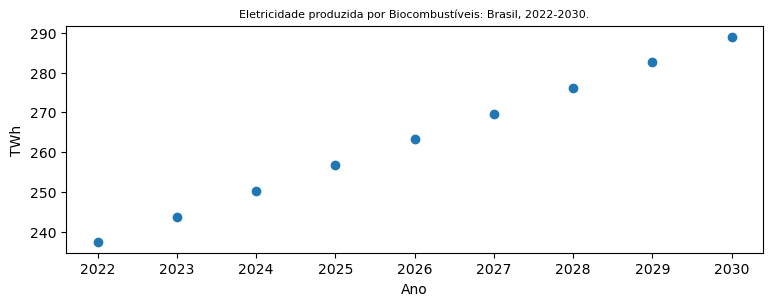

In [30]:
# juntando as duas listas e criando um dataframe
plt.figure(figsize=(9,3), dpi=100)

plt.scatter([2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030],twh);

plt.title('Eletricidade produzida por Biocombustíveis: Brasil, 2022-2030.', fontsize=8)
plt.xlabel('Ano');
plt.ylabel('TWh');

# Calculando o R^2 - Quadrado

In [32]:
dadosBioCombustiveisBrazil['Residuos'] = Y - reta

In [35]:
SQres = (dadosBioCombustiveisBrazil['Residuos'] ** 2).sum().round(4)
SQres

16325.3511

In [36]:
media = dadosBioCombustiveisBrazil['Eletricidade produzida por BioCombustíveis (TWh)'].mean()
dadosBioCombustiveisBrazil['Faturamento medio'] = media

In [38]:
SQtot = ((dadosBioCombustiveisBrazil['Eletricidade produzida por BioCombustíveis (TWh)'] - dadosBioCombustiveisBrazil['Faturamento medio'])**2).sum().round(4)

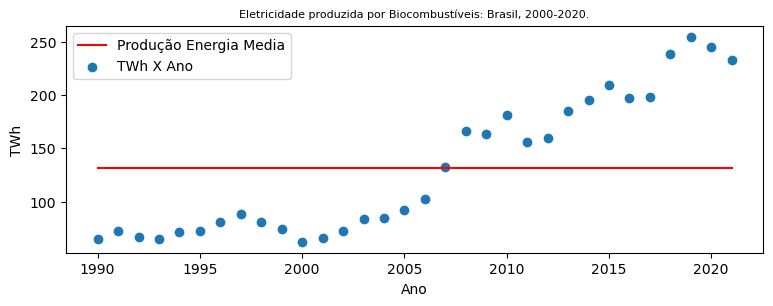

In [39]:
plt.figure(figsize=(9,3), dpi=100) # comparando o valor da media com os valores ao decorrer dos meses

plt.scatter(X,Y,label='TWh X Ano');
plt.plot(X,dadosBioCombustiveisBrazil['Faturamento medio'],label='Produção Energia Media',color='red');

plt.title('Eletricidade produzida por Biocombustíveis: Brasil, 2000-2020.', fontsize=8)
plt.xlabel('Ano');
plt.ylabel('TWh');

plt.legend();

In [40]:
# Verificando o quão bem está indo a partir do r-quadrado em relação ao modelo da média
r_quadrado = 1 - (SQres/SQtot)
(r_quadrado*100).round(3) # Valor de 87,52% de acertividade, consegue explicar 87% dos dados

87.529